In [34]:
import folium
from folium import IFrame

# Link direto da imagem
img_url = "https://picsum.photos/300/200"  # ou use qualquer outro dos exemplos acima

# HTML para o popup
html = f"""
<div style="width:300px; height:200px;">
  <img src="{img_url}" width="300" height="200" style="object-fit:cover; border-radius:12px;" />
</div>
"""

iframe = IFrame(html, width=320, height=220)
popup = folium.Popup(iframe, max_width=320)

# Coordenadas da Arena TUSCA
coords = [-22.0125, -47.8927]

# Mapa
m = folium.Map(location=coords, zoom_start=16)
folium.Marker(location=coords, popup=popup, tooltip="Arena TUSCA").add_to(m)
m.save("mapa_com_foto_externa.html")

m


In [ ]:
import folium
from folium import IFrame, Popup, Marker, CustomIcon
from folium.plugins import Fullscreen, MiniMap

# Função para gerar card Notion

def gerar_carrossel_minimalista(imagens):
    img_tags = "".join([
        f'<div class="slide"><img src="{url}"></div>' for url in imagens
    ])

    html = f"""
    <style>
    .carousel {{
        width: 270px;
        height: 180px;
        overflow: hidden;
        position: relative;
        border-radius: 10px;
    }}
    .carousel .slide {{
        display: none;
        position: absolute;
        width: 100%;
        height: 100%;
    }}
    .carousel .slide img {{
        width: 100%;
        height: 100%;
        object-fit: cover;
        border-radius: 10px;
    }}
    .carousel .slide.active {{
        display: block;
    }}
    .carousel button {{
        position: absolute;
        top: 50%;
        transform: translateY(-50%);
        background: rgba(255, 255, 255, 0.2);
        border: none;
        font-size: 18px;
        color: white;
        padding: 5px;
        cursor: pointer;
        z-index: 10;
    }}
    .carousel button:hover {{
        background: rgba(0, 0, 0, 0.3);
    }}
    .carousel #prev {{
        left: 5px;
    }}
    .carousel #next {{
        right: 5px;
    }}
    </style>

    <div class="carousel" id="carousel">
        {img_tags}
        <button id="prev">&#10094;</button>
        <button id="next">&#10095;</button>
    </div>

    <script>
    var slides = document.querySelectorAll('.carousel .slide');
    var index = 0;
    slides[index].classList.add('active');

    document.getElementById('prev').onclick = function () {{
        slides[index].classList.remove('active');
        index = (index - 1 + slides.length) % slides.length;
        slides[index].classList.add('active');
    }};
    document.getElementById('next').onclick = function () {{
        slides[index].classList.remove('active');
        index = (index + 1) % slides.length;
        slides[index].classList.add('active');
    }};
    </script>
    """
    return html


# Locais
locais = [
    {
        "titulo": "Arena TUSCA",
        "autor": "Heitor – 2023",
        "img": "fotos/sao-carlos/IMG_2401.JPG",
        "descricao": "Competição esportiva universitária cheia de momentos marcantes.",
        "coord": [-22.0145, -47.8915]
    },
    {
        "titulo": "USP São Carlos",
        "autor": "Heitor – 2022",
        "img": ["https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2418.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2419.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2485.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2497.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2506.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2516.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2552.JPG"
        ],
        "descricao": "Onde tudo começou, com estudos, amizades e desafios.",
        "coord": [-22.0056, -47.8975]
    }
]

# Mapa base com tema claro
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap")


# Plugins
Fullscreen().add_to(m)
MiniMap(toggle_display=True).add_to(m)

# Adiciona marcadores personalizados
for local in locais:
    html = gerar_carrossel_minimalista(local["img"] if isinstance(local["img"], list) else [local["img"]])
    iframe = IFrame(html, width=300, height=300)
    popup = Popup(iframe, max_width=300)
    marker = Marker(
    location=local["coord"],
    popup=popup,
    tooltip="📍 " + local["titulo"],
).add_to(m)


# Salvar
m.save("mapa_customizado.html")
m



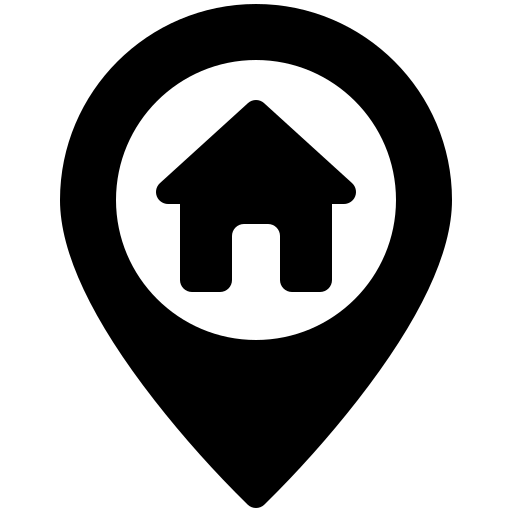

In [95]:
import folium
from folium import IFrame, Popup, Marker
from folium.plugins import Fullscreen, MiniMap
import uuid

# Função para gerar carrossel minimalista responsivo
icone = CustomIcon(
    icon_image="fotos/icons/home.png",
    icon_size=(32, 32)
)

def gerar_carrossel_minimalista(imagens):
    carousel_id = "carousel_" + str(uuid.uuid4()).replace("-", "")

    img_tags = "".join([
        f'<div class="slide"><img src="{url}"></div>' for url in imagens
    ])

    html = f"""
    <style>
    .carousel {{
        max-width: 260px;
        height: 180px;
        overflow: hidden;
        position: relative;
        border-radius: 12px;
        box-sizing: border-box;
        margin: auto;
        background: white;
    }}
    .carousel .slide {{
        display: none;
        position: absolute;
        width: 100%;
        height: 100%;
    }}
    .carousel .slide img {{
        width: 100%;
        height: 100%;
        object-fit: contain;
        border-radius: 12px;
    }}
    .carousel .slide.active {{
        display: block;
    }}
    .carousel button {{
        position: absolute;
        top: 50%;
        transform: translateY(-50%);
        background: rgba(255, 255, 255, 0.1);
        border: none;
        font-size: 24px;
        color: black;
        padding: 2px 6px;
        cursor: pointer;
        z-index: 10;
        opacity: 0.4;
    }}
    .carousel button:hover {{
        opacity: 1;
    }}
    .carousel .prev {{
        left: 4px;
    }}
    .carousel .next {{
        right: 4px;
    }}
    </style>

    <div class="carousel" id="{carousel_id}">
        {img_tags}
        <button class="prev">&#10094;</button>
        <button class="next">&#10095;</button>
    </div>

    <script>
    (function() {{
        const carousel = document.getElementById("{carousel_id}");
        const slides = carousel.querySelectorAll('.slide');
        let index = 0;
        slides[index].classList.add('active');

        carousel.querySelector('.prev').onclick = () => {{
            slides[index].classList.remove('active');
            index = (index - 1 + slides.length) % slides.length;
            slides[index].classList.add('active');
        }};

        carousel.querySelector('.next').onclick = () => {{
            slides[index].classList.remove('active');
            index = (index + 1) % slides.length;
            slides[index].classList.add('active');
        }};
    }})();
    </script>
    """
    return html

# Lista de locais com múltiplas imagens
locais = [
    {
        "titulo": "Casa",
        "coord" : [-2.4954358267741763, -44.28640375594444],
        "imagens": ["https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG" ],
    },
    {
        "titulo": "USP São Carlos",
        "coord": [-22.040719070964354, -47.86714043645404],
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2418.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2419.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2485.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2516.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2506.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2552.JPG"
        ]
    },
]

# Mapa base
m = folium.Map(location=[-22.01, -47.89], zoom_start=14, tiles="OpenStreetMap")

# Plugins úteis
Fullscreen().add_to(m)
MiniMap(toggle_display=True).add_to(m)

# Adiciona os marcadores com carrossel
for local in locais:
    html = gerar_carrossel_minimalista(local["imagens"])
    iframe = IFrame(html, width=280, height=200)
    popup = Popup(iframe, max_width=300, sticky=True)
    Marker(
        location=local["coord"],
        popup=popup,
        tooltip=local["titulo"],
        icon=icone
    ).add_to(m)

# Salvar
m.save("teste.html")
m
